In [1]:
import matplotlib.pyplot as plt
from  matplotlib import cm
import numpy as np

with open("spo.jl") as f:
    tuples = [eval(line.strip()) for line in f.readlines()]


In [2]:
relation = dict()
for spo in tuples:
    pred = spo["pred"]
    if pred in relation.keys():
        relation[pred] += 1
    else:
        relation[pred] = 1

# 按value排序一遍
relation = {k: v for k, v in sorted(relation.items(), key=lambda item: item[1], reverse=True)}

In [3]:
print(f'共有{len(relation)}种关系\n次数最多的前20种关系如下：')
for key in list(relation)[:20]:
    print(f'{key}: {relation[key]}')

共有117种关系
次数最多的前20种关系如下：
搭档: 4109
好友: 2474
同学: 676
学生: 371
老师: 363
妻子: 343
前男友: 335
丈夫: 331
前女友: 306
同门: 268
队友: 219
儿子: 198
父亲: 196
女儿: 184
母亲: 112
前妻: 110
前夫: 104
哥哥: 73
弟弟: 72
姐姐: 50


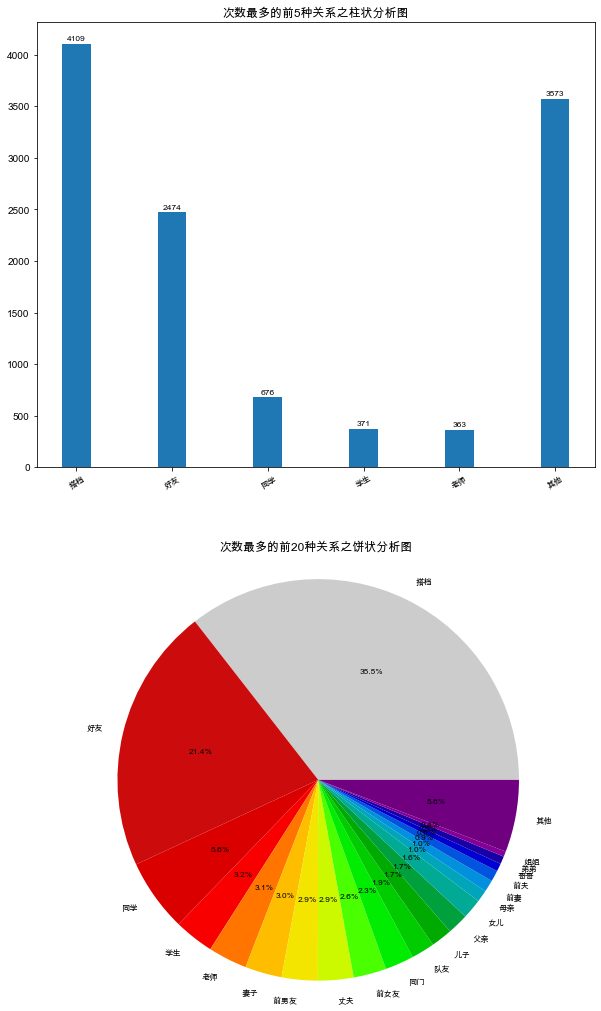

In [4]:
plt.figure(figsize=(10, 18))
x = list(relation)[:5] + ['其他']
y = list(relation.values())[:5] + [sum(list(relation.values())[5:])]
# 画柱状图
plt.subplot(211)
plt.bar(range(len(y)), y, width=0.3)
plt.xticks(range(len(x)), x, fontsize='small', rotation=30)
for i, j in enumerate(y):
    plt.text(i, j+30, j, horizontalalignment='center', fontsize='small')
plt.title('次数最多的前5种关系之柱状分析图')
# 画饼图
plt.subplot(212)
y = list(relation.values())[:20] + [sum(list(relation.values())[20:])]
labels = list(relation)[:20] + ['其他']
colors = cm.nipy_spectral_r([1. * i / len(y) for i in range(len(y))])
plt.pie(y, labels=labels, autopct="%.1f%%", textprops={'fontsize':'small'}, colors = colors)
plt.axis('equal')
plt.title('次数最多的前20种关系之饼状分析图')
plt.savefig('figure.png')
plt.show()